In [212]:
import pandas as pd
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt

In [2]:
name = input("What is your name?")

''

In [ ]:
age = input("How old are you?")

In [213]:
# pd.Timestamp(), pd.Period()
time_stamp = pd.Timestamp(datetime.now())
period = pd.Period("2017-01")
time_stamp.to_period(freq = "M")
print(time_stamp.weekofyear)
print(time_stamp.year)
print(period+2)

38
2021
2017-03


In [214]:
pd.date_range(start = "2021-07-05", periods = 3, freq = "M")

DatetimeIndex(['2021-07-31', '2021-08-31', '2021-09-30'], dtype='datetime64[ns]', freq='M')

In [215]:
yahoo = pd.read_csv("stock_data/yahoo.csv")
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index("date", inplace=True)
display(yahoo.head())
print(yahoo.loc["2013",  "price"])

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


date
2013-01-02    20.08
2013-01-03    19.78
2013-01-04    19.86
2013-01-07    19.40
2013-01-08    19.66
              ...  
2013-12-25      NaN
2013-12-26    40.65
2013-12-27    40.49
2013-12-30    40.20
2013-12-31    40.44
Name: price, Length: 260, dtype: float64


In [216]:
prices = pd.DataFrame()
for year in ['2013', '2014', "2015"]:
    price_per_year = yahoo.loc[year, ["price"]].reset_index(drop=True)
    price_per_year.rename(columns={"price": year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

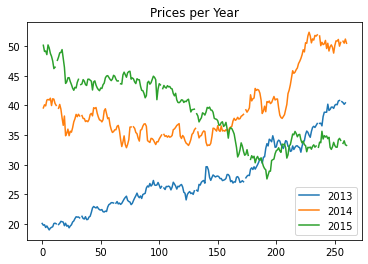

In [217]:
prices.plot(title="Prices per Year")
plt.show()

In [224]:
google = pd.read_csv("stock_data/google.csv", parse_dates=["Date"], index_col="Date")
google.head(3)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN


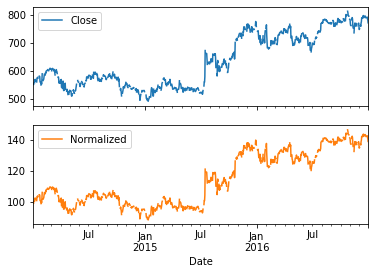

In [225]:
google["Normalized"] = google["Close"].div(google["Close"].iloc[0]).mul(100)
google.plot(subplots=True)
plt.show()

In [219]:
# Time series methods
'''
google["Shifted"] = google["Close"].shift(periods=1)
google["Lagged"] = google["Close"].shift(periods=-1)
google["Change"] = google["Close"].div(google["Shifted"])
google["Return"] = google["Change"].sub(1).mul(100)
google["Pct_change"] = google["Close"].pct_change(periods=3).mul(100)
google["Difference"] = google["Close"].diff()
google.head()'''

'\ngoogle["Shifted"] = google["Close"].shift(periods=1)\ngoogle["Lagged"] = google["Close"].shift(periods=-1)\ngoogle["Change"] = google["Close"].div(google["Shifted"])\ngoogle["Return"] = google["Change"].sub(1).mul(100)\ngoogle["Pct_change"] = google["Close"].pct_change(periods=3).mul(100)\ngoogle["Difference"] = google["Close"].diff()\ngoogle.head()'

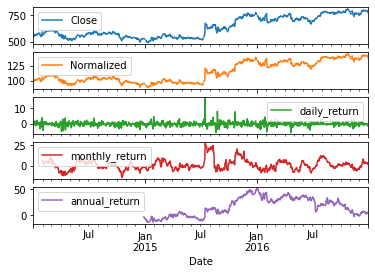

In [226]:
google['daily_return'] = google["Close"].pct_change(1).mul(100)
google['monthly_return'] = google["Close"].pct_change(30).mul(100)
google['annual_return'] = google["Close"].pct_change(360).mul(100)

google.plot(subplots=True)
plt.show()

In [227]:
prices = pd.read_csv("stock_data/stock_data.csv", parse_dates=["Date"], index_col="Date")

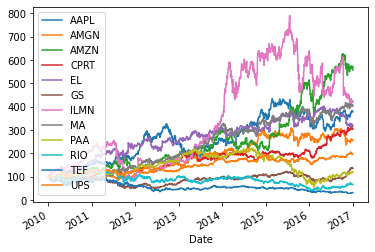

In [228]:
normalized = prices.div(prices.iloc[1]).mul(100)
normalized.plot()
plt.show()

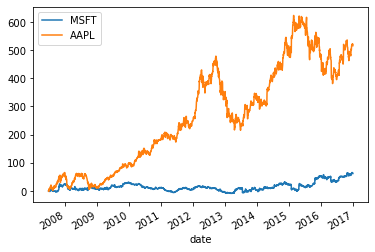

In [235]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv("stock_data/msft_aapl.csv", parse_dates=["date"], index_col="date")

# Import index here
sp500 = pd.read_csv("stock_data/sp500.csv", parse_dates=["date"], index_col="date")

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

In [250]:
dates = pd.date_range(start="2021", periods=4, freq="Q")
data = range(1, 5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2021-03-31    1
2021-06-30    2
2021-09-30    3
2021-12-31    4
Freq: Q-DEC, dtype: int64

In [248]:
monthly = quarterly.asfreq("M")
monthly = monthly.to_frame("baseline")
monthly["ffill"] = quarterly.asfreq("M", method="ffill")
monthly["bfill"] = quarterly.asfreq("M", method="bfill")
monthly["value"] = quarterly.asfreq("M", fill_value=0)
monthly

,baseline,ffill,bfill,value
2021-03-31,1.0,1,1,1
2021-04-30,NaN,1,2,0
2021-05-31,NaN,1,2,0
2021-06-30,2.0,2,2,2
2021-07-31,NaN,2,3,0
2021-08-31,NaN,2,3,0
2021-09-30,3.0,3,3,3
2021-10-31,NaN,3,4,0
2021-11-30,NaN,3,4,0
2021-12-31,4.0,4,4,4


In [254]:
gdp = pd.read_csv("stock_data/gdp_growth.csv", parse_dates=["date"], index_col="date")
gdp.head()

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7


In [260]:
gdp.resample("MS").interpolate().add_suffix("_inter")

,gdp_growth_inter
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333
2007-04-01,3.100000
2007-05-01,2.966667
...,...
2016-09-01,2.566667
2016-10-01,2.100000
2016-11-01,1.866667


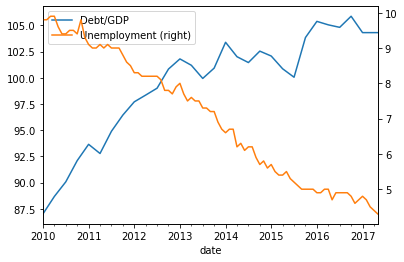

In [285]:
# Import & inspect data here
data = pd.read_csv("stock_data/debt_unemployment.csv", parse_dates=["date"], index_col="date")
# Interpolate and inspect here
interpolated = data.interpolate()
# Plot interpolated data here
interpolated.plot(secondary_y="Unemployment")
plt.show()

In [289]:
ozone = pd.read_csv("air_quality_data/ozone_nyc.csv", parse_dates=["date"], index_col="date")
ozone = ozone.resample("D").asfreq()
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


In [293]:
ozone.resample("MS").agg(["mean", "std"]).head()

Ozone          
                mean       std
date                          
2000-01-01  0.010443  0.004755
2000-02-01  0.011817  0.004072
2000-03-01  0.016810  0.004977
2000-04-01  0.019413  0.006574
2000-05-01  0.026535  0.008409

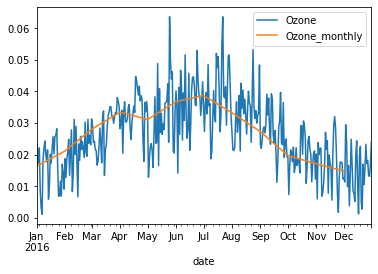

In [298]:
ozone = ozone.loc["2016"]
ax=ozone.plot()
monthly = ozone.resample("MS").mean()
monthly.add_suffix("_monthly").plot(ax=ax)
plt.show()